# Lane Changing Control

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

## Vehicle Class


In [2]:
class Vehicle : 

    def __init__(self, initial_x, initial_y, initial_theta,  speed, L):
        self.x = initial_x
        self.y = initial_y
        self.theta = initial_theta
        self.speed = speed
        self.L = L

    def update_position (self, dt, delta):

        self.x = self.x + self.speed * np.cos(self.theta) * dt
        self.y = self.y + self.speed * np.sin(self.theta) * dt
        self.theta = self.theta + (self.speed / self.L) * np.tan(delta) * dt

    


## Lateral Position Controller


In [3]:
class Lateral_position_controller:

    def __init__(self, kp_l , kd_l, desired_y):
        self.kp_l = kp_l
        self.kd_l = kd_l
        self.desired_y = desired_y
        self.previous_error = 0

    def theta_calculation(self, y, dt):
        error =  self.desired_y - y
        derivative = (error -self.previous_error)/dt
        self.previous_error = error
        control_signal = self.kp_l * error + self.kd_l * derivative

        return control_signal
        #return np.clip(control_signal, -np.pi/4, np.pi/4)



In [4]:
class head_theta_controller:

    def __init__(self, kp_t, kd_t):

        self.kp_t = kp_t
        self.kd_t = kd_t
        self.previous_error = 0

    def theta_update (self, theta, theta_d, dt):
        error = theta_d - theta
        derivative = (error - self.previous_error)/dt
        self.previous_error = error
        control_signal = self.kp_t * error + self.kd_t * derivative

        return control_signal
        #return np.clip(control_signal, -np.pi/6, np.pi/6)






## Simulation Parameters

In [5]:
simulation_time = 10
dt = 0.1
steps = np.arange(0,simulation_time,dt)

## Vehicle & Controllers parameters

In [6]:
Vehicle = Vehicle(0, 0, 0, 10, 2.5)
lpc = Lateral_position_controller(0.1, 0.05, 3)
htc = head_theta_controller(0.5, 0.1)

## arrays initiallization



In [7]:
x_hist = [Vehicle.x]
y_hist = [Vehicle.y]
theta_hist = []
theta_steering_hist = []
theta_d_hist = []

## Simulation

In [8]:
for i in steps:
    theta_d = lpc.theta_calculation(Vehicle.y, dt = dt)
    delta = htc.theta_update(Vehicle.theta,theta_d, dt)
    Vehicle.update_position(dt, delta)
    
    x_hist.append(Vehicle.x)
    y_hist.append(Vehicle.y)
    theta_hist.append(Vehicle.theta)
    theta_steering_hist.append(delta)
    theta_d_hist.append(theta_d)
    

## Plot

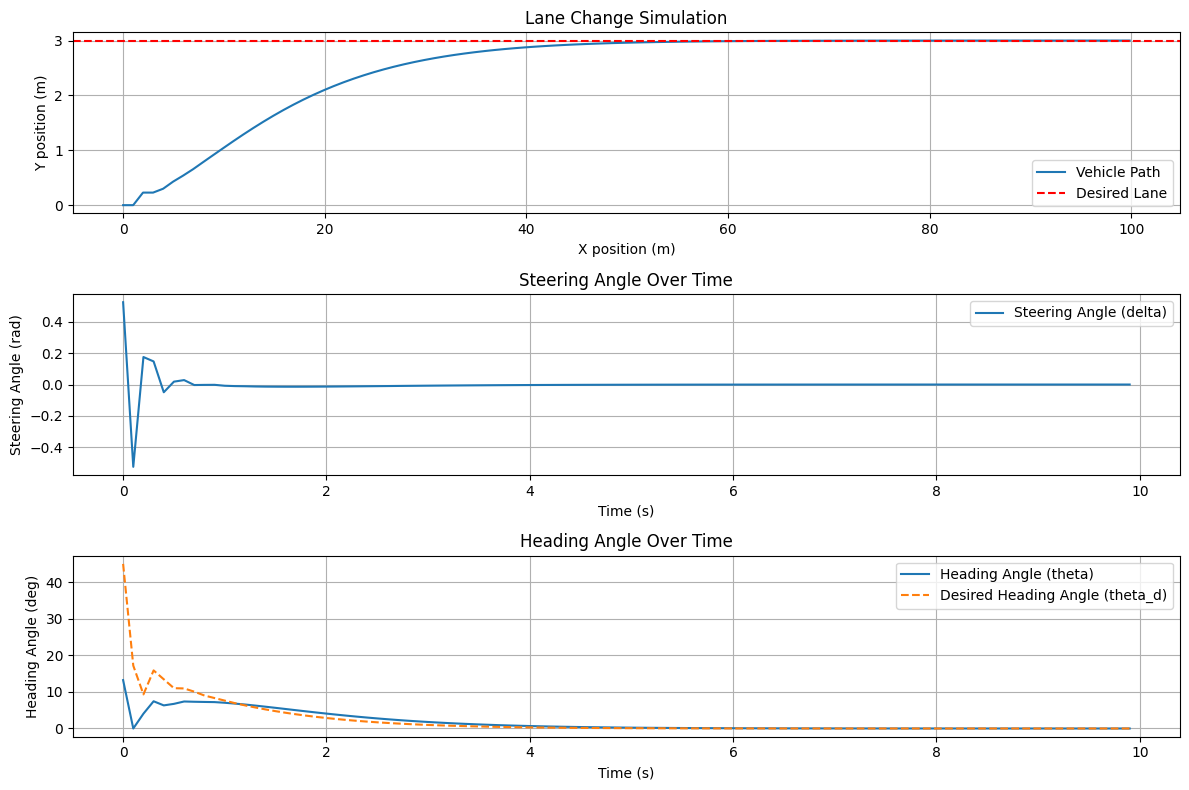

In [9]:
# Convert theta_hist to degrees for easier visualization
theta_hist_deg = np.degrees(theta_hist)
theta_d_hist_deg = np.degrees(theta_d_hist)

# Plotting the trajectory, steering angle, and heading angle
plt.figure(figsize=(12, 8))

# Plot vehicle path
plt.subplot(3, 1, 1)
plt.plot(x_hist, y_hist, label="Vehicle Path")
plt.axhline(y=3, color='r', linestyle='--', label="Desired Lane")
plt.xlabel("X position (m)")
plt.ylabel("Y position (m)")
plt.title("Lane Change Simulation")
plt.legend()
plt.grid()

# Plot steering angle
plt.subplot(3, 1, 2)
plt.plot(steps , theta_steering_hist, label="Steering Angle (delta)")
plt.xlabel("Time (s)")
plt.ylabel("Steering Angle (rad)")
plt.title("Steering Angle Over Time")
plt.legend()
plt.grid()

# Plot heading angle
plt.subplot(3, 1, 3)
plt.plot(steps, theta_hist_deg, label="Heading Angle (theta)")
plt.plot(steps, theta_d_hist_deg, label="Desired Heading Angle (theta_d)", linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Heading Angle (deg)")
plt.title("Heading Angle Over Time")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()